In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [31]:
data.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [32]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [33]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [35]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [36]:
# Model building
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [37]:
log_reg.predict(X_train)

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [38]:
# 30 yrs old and 87000$
X_transformed = sc_X.transform([[30, 87000]])

In [39]:
log_reg.predict(X_transformed)

array([0])

In [45]:
# predict on test set
y_pred = log_reg.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),axis=1)

array([[0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1,

In [46]:
# Confusion matrix, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[50,  9],
       [ 2, 19]])

In [47]:
accuracy_score(y_test, y_pred)

0.8625

/var/folders/9c/tw5l79697m9_ccbr5fmrv42m0000gn/T/ipykernel_64331/2236171354.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)


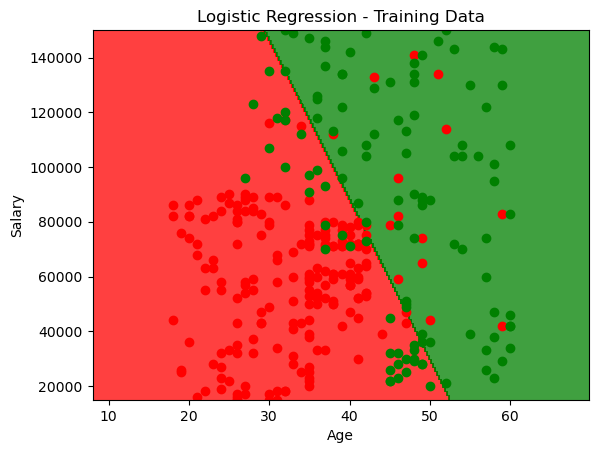

In [60]:
# Predicting train set
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_train), y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:, 0].max() + 10,step = 0.25), 
                     np.arange(start = X_set[:,1].min() - 10, stop = X_set[:, 1].max() + 10,step = 0.25))
plt.contourf(X1, X2, log_reg.predict(sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
             , alpha = 0.75, cmap = ListedColormap(['r','g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)

plt.title("Logistic Regression - Training Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend
plt.show()

/var/folders/9c/tw5l79697m9_ccbr5fmrv42m0000gn/T/ipykernel_64331/4049192245.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)


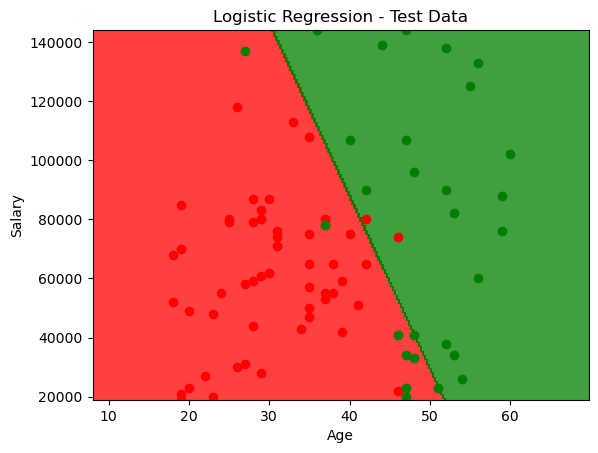

In [61]:
# Predicting test set
from matplotlib.colors import ListedColormap

X_set, y_set = sc_X.inverse_transform(X_test), y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:, 0].max() + 10,step = 0.25), 
                     np.arange(start = X_set[:,1].min() - 10, stop = X_set[:, 1].max() + 10,step = 0.25))
plt.contourf(X1, X2, log_reg.predict(sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
             , alpha = 0.75, cmap = ListedColormap(['r','g']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['r','g'])(i), label=j)

plt.title("Logistic Regression - Test Data")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend
plt.show()

In [51]:
X1

array([[ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       ...,
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75],
       [ 8.  ,  8.25,  8.5 , ..., 69.25, 69.5 , 69.75]])

In [52]:
X2

array([[ 14990.  ,  14990.  ,  14990.  , ...,  14990.  ,  14990.  ,
         14990.  ],
       [ 14990.25,  14990.25,  14990.25, ...,  14990.25,  14990.25,
         14990.25],
       [ 14990.5 ,  14990.5 ,  14990.5 , ...,  14990.5 ,  14990.5 ,
         14990.5 ],
       ...,
       [150009.25, 150009.25, 150009.25, ..., 150009.25, 150009.25,
        150009.25],
       [150009.5 , 150009.5 , 150009.5 , ..., 150009.5 , 150009.5 ,
        150009.5 ],
       [150009.75, 150009.75, 150009.75, ..., 150009.75, 150009.75,
        150009.75]])